In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import  citipy
from datetime import datetime
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create random lat-long pairs
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add lat-long pairs to list
coordinates = list(lat_lngs)

In [4]:
# Create list to hold cities
cities = []
# ID nearest city to each lat-long pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # Add to list if unique
    if city not in cities:
        cities.append(city)
# Print city count to confirm sufficient length
len(cities)

652

In [5]:
# Create empty list to hold weather data
city_data = []
# Print log start
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in list
for i, city in enumerate(cities):
    
    # Group cities by 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log url, record and set numbers, and city name
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Iterate record count
    record_count += 1
    # Run API request for city
    try: 
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out data of interest
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append city info into city_data
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    # Skip city if error occurs
    except:
        print("City not found. Skipping...")
        pass
# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | virginia beach
Processing Record 3 of Set 1 | kutum
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | san quintin
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | okhotsk
Processing Record 9 of Set 1 | segezha
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | trat
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | grand-santi
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of

Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | ust-kut
Processing Record 41 of Set 4 | tambura
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | cape coast
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | dabakala
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | barra do bugres
Processing Record 48 of Set 4 | ewa beach
Processing Record 49 of Set 4 | kattivakkam
Processing Record 50 of Set 4 | salinas
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | kizukuri
Processing Record 3 of Set 5 | milkovo
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | san roque
Processing Record 6 of Set 5 | lida
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | pacific grove
Processing Record 10 of Set 5 | esperance
Processing Record 11 of S

Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | codrington
Processing Record 29 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 8 | hurghada
Processing Record 31 of Set 8 | mecca
Processing Record 32 of Set 8 | sturgeon falls
Processing Record 33 of Set 8 | yeppoon
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | nevyansk
Processing Record 36 of Set 8 | camocim
Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | ayan
Processing Record 40 of Set 8 | kalabo
Processing Record 41 of Set 8 | rosetta
Processing Record 42 of Set 8 | upernavik
Processing Record 43 of Set 8 | monrovia
Processing Record 44 of Set 8 | saint-georges
Processing Record 45 of Set 8 | kanniyakumari
Processing Record 46 of Set 8 | castro
Processing Record 47 of Set 8 | de-kastri
Processing Record 48 of Set 8 | juneau
Processing Record 49 of Set 8 | urdzhar
City not found. Skip

Processing Record 17 of Set 12 | dongsheng
Processing Record 18 of Set 12 | kangaatsiaq
Processing Record 19 of Set 12 | burica
City not found. Skipping...
Processing Record 20 of Set 12 | zhanaozen
Processing Record 21 of Set 12 | makakilo city
Processing Record 22 of Set 12 | havelock
Processing Record 23 of Set 12 | dedovichi
Processing Record 24 of Set 12 | oltina
Processing Record 25 of Set 12 | samana
Processing Record 26 of Set 12 | wabag
Processing Record 27 of Set 12 | tura
Processing Record 28 of Set 12 | boffa
Processing Record 29 of Set 12 | saquena
Processing Record 30 of Set 12 | eldikan
City not found. Skipping...
Processing Record 31 of Set 12 | luanda
Processing Record 32 of Set 12 | kieta
Processing Record 33 of Set 12 | oriximina
Processing Record 34 of Set 12 | san cristobal
Processing Record 35 of Set 12 | ossora
Processing Record 36 of Set 12 | hualmay
Processing Record 37 of Set 12 | litovko
Processing Record 38 of Set 12 | kedrovyy
Processing Record 39 of Set 12

In [6]:
len(city_data)

596

In [7]:
# Convert dictionary array to DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,66.00,93,100,20.00,ZA,2021-01-31 19:42:52
1,Virginia Beach,36.8529,-75.9780,43.00,98,100,1.01,US,2021-01-31 19:39:02
2,Kutum,14.2000,24.6667,61.63,28,0,7.09,SD,2021-01-31 19:42:52
3,Bluff,-46.6000,168.3333,57.36,78,56,5.37,NZ,2021-01-31 19:42:52
4,San Quintin,30.4833,-115.9500,62.67,51,98,3.78,MX,2021-01-31 19:37:58
5,Albany,42.6001,-73.9662,19.99,46,100,3.02,US,2021-01-31 19:39:46
6,Vaini,-21.2000,-175.2000,77.00,100,90,14.97,TO,2021-01-31 19:42:52
7,Okhotsk,59.3833,143.3000,-14.78,77,0,15.64,RU,2021-01-31 19:42:52
8,Segezha,63.7415,34.3222,9.28,96,94,2.55,RU,2021-01-31 19:42:53
9,Busselton,-33.6500,115.3333,63.00,83,0,1.01,AU,2021-01-31 19:42:53


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-01-31 19:42:52,-34.5322,20.0403,66.00,93,100,20.00
1,Virginia Beach,US,2021-01-31 19:39:02,36.8529,-75.9780,43.00,98,100,1.01
2,Kutum,SD,2021-01-31 19:42:52,14.2000,24.6667,61.63,28,0,7.09
3,Bluff,NZ,2021-01-31 19:42:52,-46.6000,168.3333,57.36,78,56,5.37
4,San Quintin,MX,2021-01-31 19:37:58,30.4833,-115.9500,62.67,51,98,3.78
...,...,...,...,...,...,...,...,...,...
591,Saint-Joseph,RE,2021-01-31 19:43:41,-21.3667,55.6167,82.40,65,0,18.41
592,Aranos,NA,2021-01-31 19:43:41,-24.1333,19.1167,80.08,41,44,6.17
593,Waipawa,NZ,2021-01-31 19:43:42,-41.4122,175.5153,60.80,77,2,17.27
594,Broken Hill,AU,2021-01-31 19:43:42,-31.9500,141.4333,73.40,28,75,3.44


In [9]:
# Create output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export DF into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

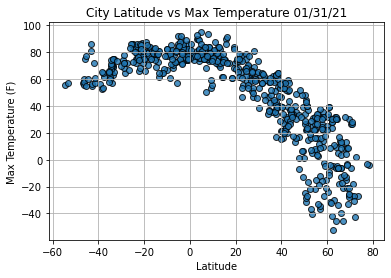

In [12]:
# Import time module
import time

# Build scatter plot lat vs Max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label='Cities')

# Incorporate other graph proprperties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

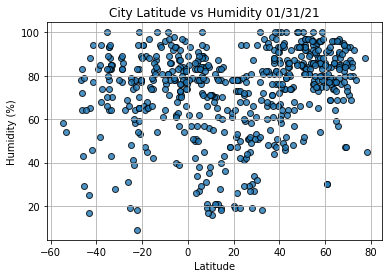

In [13]:
# Build scatter plot lat vs Max temp
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label='Cities')

# Incorporate other graph proprperties
plt.title(f"City Latitude vs Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

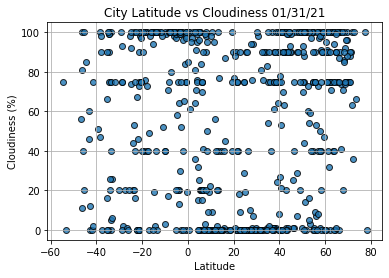

In [14]:
# Build scatter plot lat vs Max temp
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label='Cities')

# Incorporate other graph proprperties
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build scatter plot lat vs Max temp
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label='Cities')

# Incorporate other graph proprperties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Cloudiness ()")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()